# Analysing westbound traffic on the I-94 Interstate highway

## Introduction

[Interstate 94](https://en.wikipedia.org/wiki/Interstate_94) (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.

This project aims to analyse the westbound traffic on the Interstate highway. Our primary goal is to determine a few indicators of heavy traffic on the highway through visualisation techniques using pandas and matplotlib modules.

The data captured in the dataset is roughly midway between Minneapolis and St Paul, MN. So it is important to keep in mind that the traffic we analyse does not cover the entire interstate highway but only between these two points.  
  
  
## Exploratory Analysis    
    
    
Lets first begin by importing pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Enables Jupyter to generate graphs
%matplotlib inline                

#Lets python display all outputs or last output of the code block depending on whether text is set as "all" or "last"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

Lets first read our csv file and explore the data to get a better understanding of its structure.

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
InteractiveShell.ast_node_interactivity = "last"
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see the data comprises of 48203 rows (excluding the header), and 9 columns.

Information about the coloumns are below:

|Column Name| Type|Description|
|-----------|-----------|----------|
|holiday| Categorical |US National holidays plus regional holiday, Minnesota State Fair|
|temp| Numeric |Average temp in kelvin|
|rain_1h| Numeric |Amount in mm of rain that occurred in the hour|
|snow_1h| Numeric |Amount in mm of snow that occurred in the hour|
|clouds_all| Numeric |Percentage of cloud cover|
|weather_main| Categorical |Short textual description of the current weather|
|weather_description| Categorical |Longer textual description of the current weather|
|date_time| DateTime |Hour of the data collected in local CST time|
|traffic_volume| Numeric |Hourly I-94 ATR 301 reported westbound traffic volume|

The original dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). 


To begin our visual analysis lets plot a histogram of the traffic volume column from our dataset.

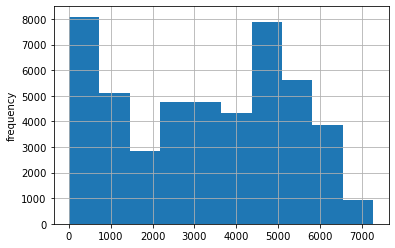

In [4]:
traffic['traffic_volume'].plot.hist()
plt.grid()
plt.ylabel('frequency')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see from the histogram and the describe function that the mean is traffic volume is around 3259 cars and the max traffic volume recorded is 7280 cars.

About 25% of the time traffic volume is under 1193 cars passing the station each hour.   
About 25% of the time the traffic volume is over 4933 cars passing the station each hour.

To analyse the data further lets first isolate the day ttime traffic and the night time traffic.

In order to do so we will first convert the *date_time* column from str to datetime format so it is easier to work with.

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'], format = '%Y-%m-%d %H:%M:%S')

Next we isolate the data into new dataframes daytime_traffic and nighttime_traffic using the following boolean conditions:  


7am to 7pm - Day Time  
7pm to 7am - Night Time

In [7]:
daytime_traffic = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 18)] #Seperates data from 7am to 7pm
nighttime_traffic = traffic[(traffic['date_time'].dt.hour <= 6) | (traffic['date_time'].dt.hour >= 19)] #Seperates data from 7pm to 7 am

if len(daytime_traffic)+len(nighttime_traffic) == len(traffic):
     print('All datapoints in traffic are isolated into daytime_traffic and nighttime_traffic') #Simple check to verify daytime and nighttime data is isolated and nothing is missed out.

All datapoints in traffic are isolated into daytime_traffic and nighttime_traffic


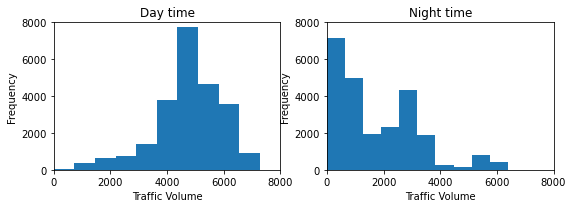

In [8]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.title('Day time')
plt.xlabel('Traffic Volume')
plt.tight_layout()
daytime_traffic['traffic_volume'].plot.hist(xlim = (0,8000), ylim=(0,8000))


plt.subplot(1,2,2)
plt.title('Night time')
plt.xlabel('Traffic Volume')
plt.tight_layout()
nighttime_traffic['traffic_volume'].plot.hist(xlim = (0,8000), ylim = (0,8000))

plt.show()

In [9]:
daytime_traffic['traffic_volume'].describe()
nighttime_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The above histograms shows us the frequency of traffic volume measured on the highway for day time and night time.  

One clear observation we can make is that during night time there are far lesser traffic volume. Most of the traffic volume is between the range of 0 to 2500 at night time. With the mean traffic volume being 1785 cars passing per hour.

Another observation we can make is the day time histrogram has most of its data clustered around 4000 to 6000 traffic volume mark. This indicates that during day time the traffic is normally much higher as this can also be confirmed with the mean traffic volume for day time being 4762 cars passing per hour.

Hence we can note that the first broad factor that affects traffic volume is the time of day. Generally speaking, during day time there is more traffic and this can be explained by the fact that most people are awake during the day and have to get to work or run errands etc.

Moving forward we will be using the day time traffic data to further analyse what factors during the day are causing high traffic volumes.



## Analysing day time traffic on the I-94 by month, day, and time of day

We have establised that during the day time the traffic is generally higher compared to night time. Once of the possible indicators of heavy traffic is time. There might be a certain month, day or time of day that usually has heavy traffic.  

Lets begin by first grouping our data into the required categories:

### By month

In [10]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()  #using groupby combined with mean method gives us the average of all the coloumns in the df by month.
by_month['traffic_volume']

<ipython-input-10-0392a4de8c7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['month'] = daytime_traffic['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

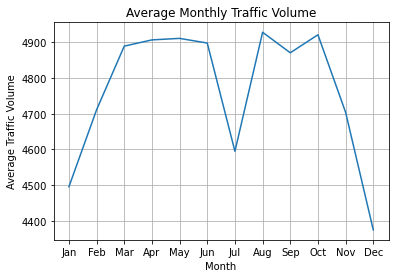

In [11]:
plt.plot(by_month.index, by_month['traffic_volume'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.title('Average Monthly Traffic Volume')
plt.grid()
plt.show()

In the above plot we can wee the highest traffic is normally during the months of March, April, May, June, August, September, October. 

The average traffic seems to be lower in the months of January, July, and Decemeber. This could maybe be attributed by Holiday Seasons for January and December, and Summer vacation during the month of July. Although this is just an assumption and further analysis would be required to prove this.

### By day of the week

In [12]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-12-75beb36b9512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

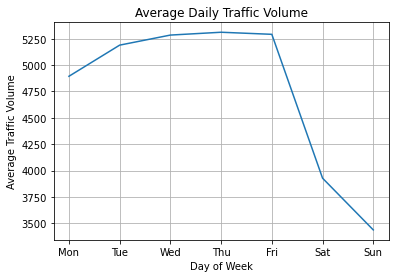

In [13]:
plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.title('Average Daily Traffic Volume')
plt.grid()
plt.show()

Plotting the graph for Average Daily Traffic Volume we can see somewhat expected results where Monday to Friday (Weekdays) the average traffic is somewhat consistently high at around 5000. While during Saturday and Sunday (Weekends) the average traffic volume drops significantly to around 3750.  

### By Hour

Now lets analyse and generate a line plot for the time of day. As we saw above if we were to include the hours present during the weekends it would significantly drop down our average. So lets analyse the weekday and weekend data seperately.


In [14]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-14-f3f666925a13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour


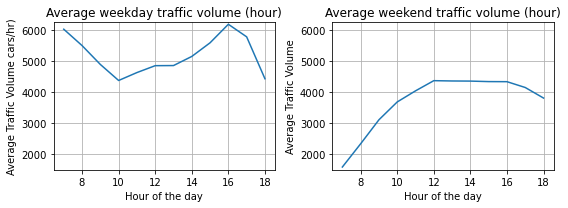

In [15]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.title('Average weekday traffic volume (hour)')
plt.xlabel('Hour of the day')
plt.ylabel('Average Traffic Volume cars/hr)')
plt.ylim(1500,6250)
plt.tight_layout()
plt.grid()
plt.plot(by_hour_business.index, by_hour_business['traffic_volume'])

plt.subplot(1,2,2)
plt.title('Average weekend traffic volume (hour)')
plt.xlabel('Hour of the day')
plt.ylabel('Average Traffic Volume')
plt.ylim(1500,6250)
plt.tight_layout()
plt.grid()
plt.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'])

plt.show()

From the above two graphs we can deduce the following:

* Week day traffic is generally at its peak (approx 6000 cars per hour) at 7 am and 4pm. This can be attributed to the standard work timings the majority of the population follows.

* Weekends we can observe very low traffic (approx 3000 cars per hour)  in the morning (from 7-10 am)and the maximum traffic is around the afternoon (approx 4500 cars per hour). This could be attributed to the fact that most people would be waking up late during the weekends and begin getting on the road only after noon for their weekend plans.


## Observations from Numerical Data

From the above analysis by month, by day, and by hour we reached the following conclusions:

* Traffic is normally higher during the months of March, April, May, June, August, September, October.
* Traffic is normally heavy during the weekdays compared to weekends.
* On weekdays, the rush hours are 7am and 4pm.

## Analysing whether weather affects traffic volume

In the below analysis we aim to find out what role weather plays regarding the traffic volume on the I-94 Interstate Highway. 

### Analysing numerical weather data

We first will analyse the numerical weather columns and the traffic volume to see if either temperature, rain, snow or clouds correlate to high traffic volumes.

We do this by using the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) and analysing if there are any high negative or high positive correlations between the four columns and the traffic volume column.

*Note: corr can range between -1 to +1.  
-1 meaning high negative correlation, while +1 meaning high positive correlation. 0 would mean there is no correlation at all*

In [16]:
num_weather = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
for weather in num_weather:
    corr = traffic['traffic_volume'].corr(traffic[weather])
    print("Correlation between traffic volume and {} is {}".format(weather, corr))

Correlation between traffic volume and temp is 0.13029879817112655
Correlation between traffic volume and rain_1h is 0.004713702367859224
Correlation between traffic volume and snow_1h is 0.0007334345358283855
Correlation between traffic volume and clouds_all is 0.06705377704283509


From the above we can see the highest value in corr is for temperature (corr = 0.13). Although there is a slight positive correlation with temperature, is still not considered high enough to be considered a reliable indicator of heavy traffic.

Lets plot a scatter plot to visualise the correlation between temperature and traffic volume

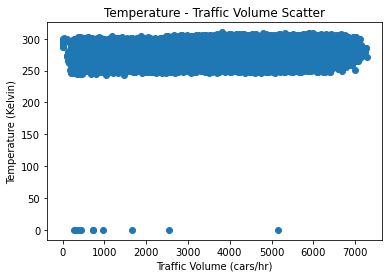

In [17]:
plt.title('Temperature - Traffic Volume Scatter')
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Temperature (Kelvin)')
plt.scatter(traffic['traffic_volume'],traffic['temp'])
plt.show()

On first observation we can see most of the data is clustered around the 250 Kelvin to 300 Kelvin mark. There are a few  outliers where the temp is around 0 Kelvin (-273.15 degree Celsius!).  

We can safely ignore these on our visualisation by either removing them from the dataframe and replotting the scatter plot or by focusing on the densely populated area of the graph by setting accurate y axis limits.

In this case since beside the temperature data the remaining columns of the row may still be correct we will simply just zoom in by setting an accurate ylim.

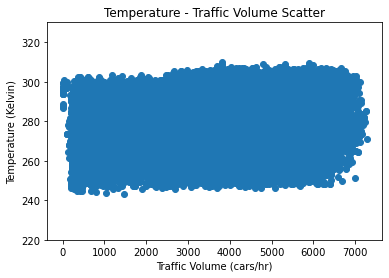

In [18]:
plt.title('Temperature - Traffic Volume Scatter')
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Temperature (Kelvin)')
plt.ylim(220,330)
plt.scatter(traffic['traffic_volume'],traffic['temp'])
plt.show()

This graph just like our correlation coefficient of 0.13 does not tell us much. It is simply too low of a correlation to be considered as a factor for traffic volume.

### Analysing categorical weather data


Now lets move on to analyse the categorical weather-related columns

In [19]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_desc = daytime_traffic.groupby('weather_description').mean()

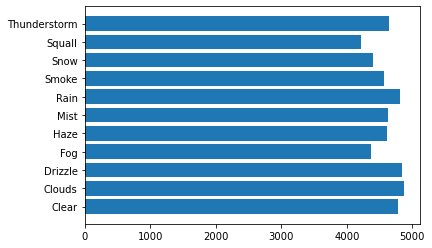

In [20]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

In [21]:
cv =(by_weather_main['traffic_volume'].describe()['std'])/(by_weather_main['traffic_volume'].describe()['mean'])
print("Mean = {}".format(by_weather_main['traffic_volume'].describe()['mean']))
print("Standard deviation = {}".format(by_weather_main['traffic_volume'].describe()['std']))
print("Coefficient of Variance = {}".format(cv))

Mean = 4611.190225354678
Standard deviation = 212.71059143901974
Coefficient of Variance = 0.046129216328883664


The above analysis of the weather_main column tells us the weather does not affect the traffic drastically. We can see the average traffic volume is 4611 with a standard deviation of 212. Which means the CV (Coefficient of Variance) is very low and implys the values are not very dispersed from one another.

Lets analyse the second categorical weather column to see if this can provide us more insights.

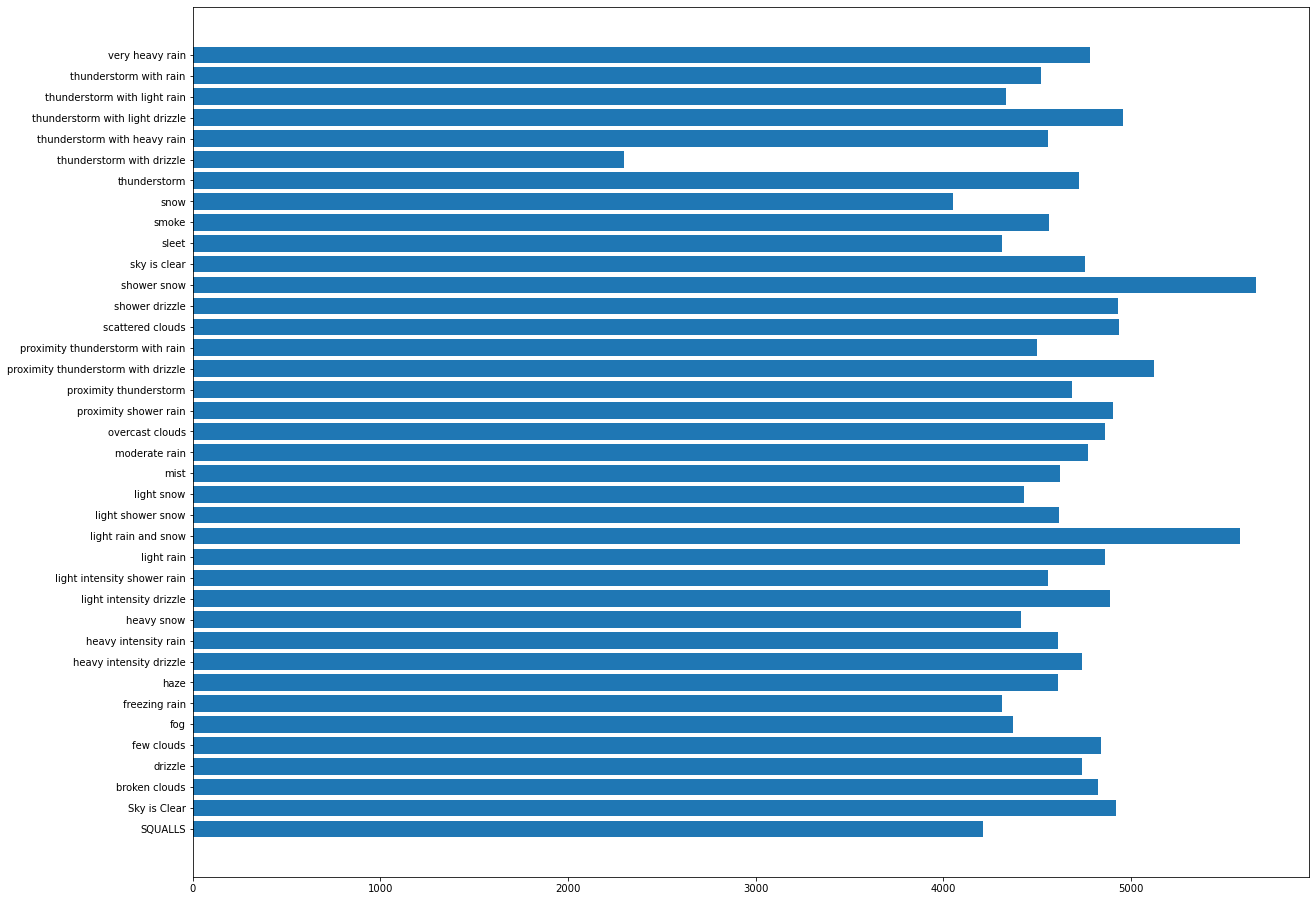

In [22]:
plt.figure(figsize=(20,16))
plt.barh(by_weather_desc.index,by_weather_desc['traffic_volume'])
plt.show()

## Observations from categorical data

From the above figure we can see a bit more variance immediately. We can see that the following the average traffic volume is generally higher during light rain and snow, shower snow, and proximity thunderstorm and drizzle.



## Summary

After analysing the numerical and categorical data in our dataset we can summarize the following 2 types of indicatiors of heavy traffic on the I-94 Interstate highway:

### Time Indicators
* Traffic is normally higher during the months of March, April, May, June, August, September, October.
* Traffic is normally heavy during the weekdays compared to weekends.
* On weekdays, the rush hours are 7am and 4pm.

### Weather Indicators
* Shower Snow
* Light rain and snow
* Proximity thunderstorm with drizzle